# Molprobity analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
def get_ref_molprob():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("../RAW_DATA/reference-molprob.csv", index_col = 0)
  
    return ref_df

def make_molprob_df(run):
#     run = "analysis_{}".format(run)
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_molprob.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_molprob.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_molprob.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_molprob.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_molprob.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_molprob.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_molprob.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_molprob.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_molprob.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_molprob.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_molprob.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_molprob.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_molprob.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_molprob.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

def combine_dfs(analyzer):
    final_df = pd.DataFrame()
    ref_df = get_ref_molprob()
    for run in runs:
        df_list = make_molprob_df(run)
        data_frame = pd.DataFrame()
        for df in iter(df_list):
            if df.shape[0] != 0:
                structure = df.index[0][:4]

                df = df.sort_values("HADDOCK-score").reset_index().drop("structure", axis=1)
                df = df.sub(ref_df.loc[structure, analyzer])
                data_frame = pd.concat([data_frame, df[analyzer]], ignore_index=True)
        final_df = pd.concat([final_df, data_frame], axis=1, ignore_index=True)
    return final_df



In [3]:
runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   

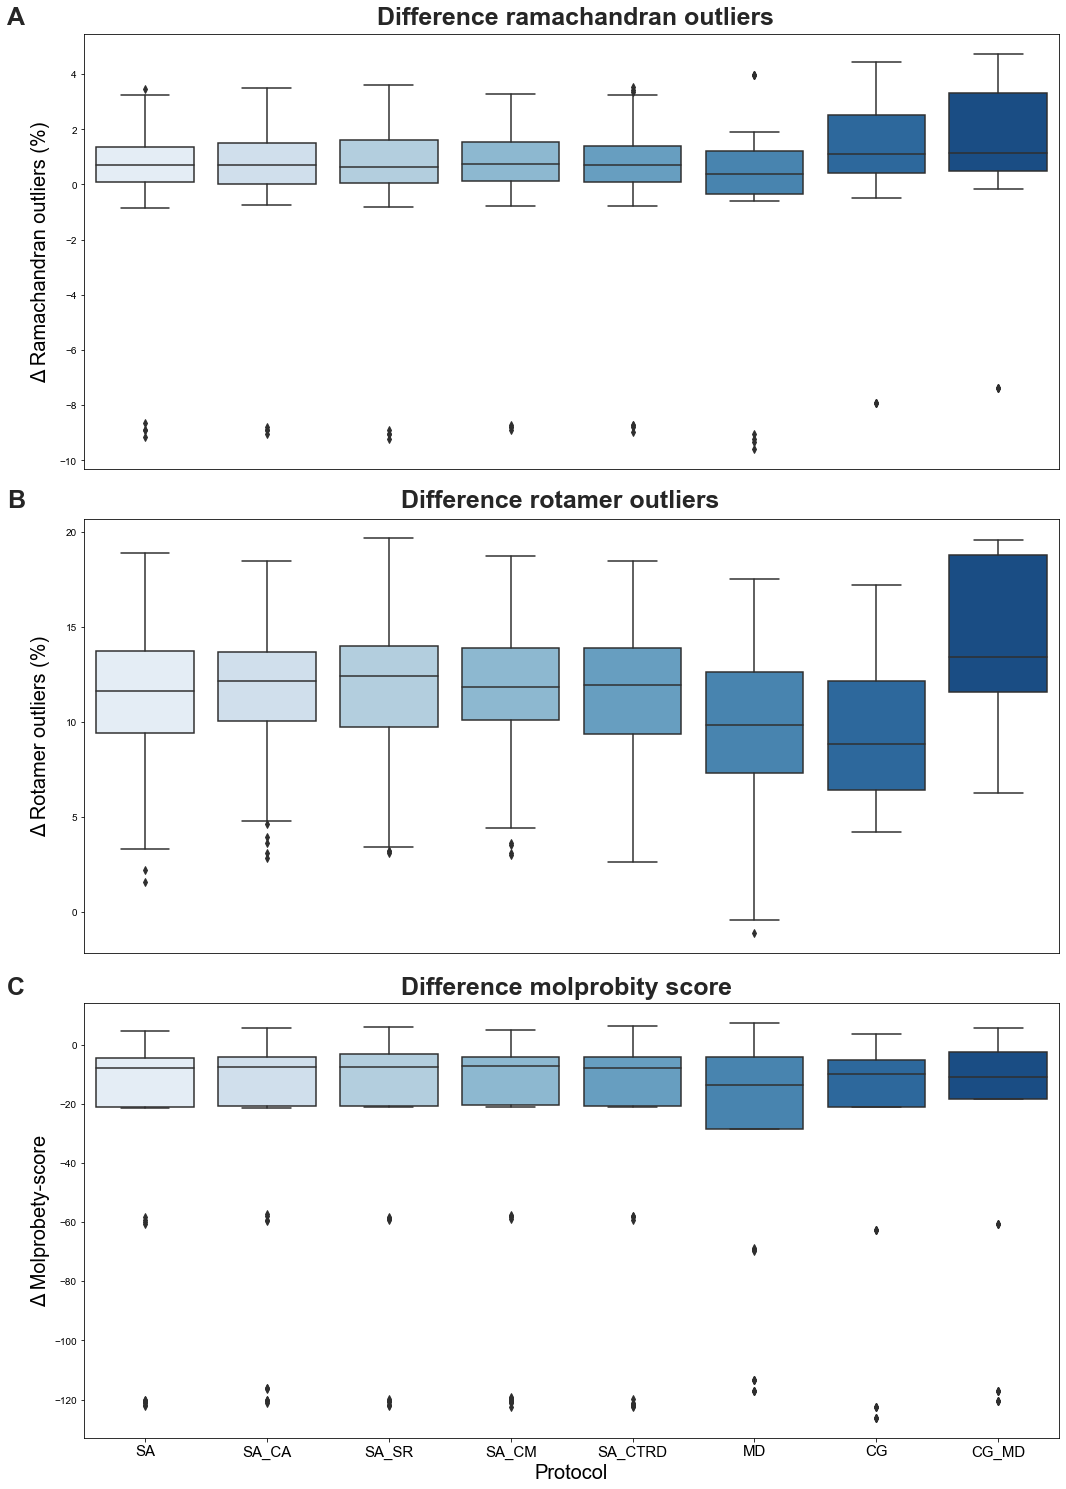

In [4]:
rota_df = combine_dfs("rotameroutliers")
rama_df = combine_dfs("ramaoutliers")
mol_df = combine_dfs("clashscore")

fig, ax = plt.subplots(nrows=3, figsize=(15,21))
sns.set(font_scale=1.5, style="whitegrid")

# fill the plots
rama_plot = sns.boxplot(data=rama_df, ax=ax[0], palette="Blues")
rota_plot = sns.boxplot(data = rota_df, ax=ax[1], palette="Blues")
mol_plot = sns.boxplot(data=mol_df, ax=ax[2], palette="Blues")


rama_plot.set_xticks([])
rota_plot.set_xticks([])
mol_plot.set_xticklabels(runs, fontsize=15)

rama_plot.set_ylabel("Δ Ramachandran outliers (%)", fontsize=20)
rota_plot.set_ylabel("Δ Rotamer outliers (%)", fontsize=20)
mol_plot.set_ylabel("Δ Molprobety-score", fontsize=20)
mol_plot.set_xlabel("Protocol", fontsize=20)


rama_plot.text(1.9,5.8,"Difference ramachandran outliers", fontsize=25, weight="semibold")
rama_plot.text(-1.13,5.8,"A", fontsize=25, weight="semibold")

rota_plot.text(2.1,21.3,"Difference rotamer outliers", fontsize=25, weight="semibold")
rota_plot.text(-1.13,21.3,"B", fontsize=25, weight="semibold")

mol_plot.text(2.1,17,"Difference molprobity score", fontsize=25, weight="semibold")
mol_plot.text(-1.13,17,"C", fontsize=25, weight="semibold")


fig.align_ylabels(ax[:])
plt.tight_layout()
# plt.savefig("molprob-final", dpi=300)